3.6835712821171106e-08
1.625231499223985e-08


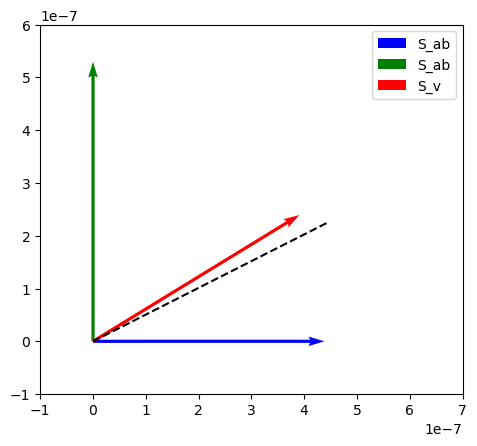

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# =================================================================================
deg = np.deg2rad(90-43.15-20)
# =================================================================================

df = pd.read_excel('result.xlsx')

S_ab = df.loc[df["data_name"]=="Co11-20(op)", "S_ANE"].values[0]
S_c = df.loc[df["data_name"]=="Co0001(op)", "S_ANE"].values[0]

S_matrix = np.array([[S_ab, 0], [0, S_c]])
M_v = np.array([np.cos(deg), np.sin(deg)])
S_v = np.dot(S_matrix, M_v)

deviate = S_v - np.dot(M_v, S_v) * M_v
print(np.linalg.norm(deviate))
print(df.loc[df["data_name"]=="Co1-102(ipp)", "S_ANE"].values[0])

# Plotting the vectors
fig, ax = plt.subplots()
ax.set_aspect('equal', adjustable='box')
ax.quiver(0, 0, S_ab, 0, angles='xy', scale_units='xy', scale=1, color='b', label='S_ab')
ax.quiver(0, 0, 0, S_c, angles='xy', scale_units='xy', scale=1, color='g', label='S_ab')

ax.plot([0, M_v[0]*5e-7], [0, M_v[1]*5e-7], 'k--')
ax.quiver(0, 0, S_v[0], S_v[1], angles='xy', scale_units='xy', scale=1, color='r', label='S_v')

ax.set_xlim(-1e-7, 7e-7)
ax.set_ylim(-1e-7, 6e-7)
ax.legend()

plt.show()